## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("../Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN'], axis=1)
application_df = application_df.drop(['NAME'], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = ['T9','T13','T12','T2','T25','T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Look at CLASSIFICATION value counts for binning
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [7]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE

In [8]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = ['C7000', 'C1700','C4000','C5000', 'C1270','C2700','C2800','C7100','C1300','C1280','C1230','C1400'
'C7200','C2300','C1240','C8000','C7120','C1500','C1800','C6000','C1250','C8200','C1278','C1238','C1237','C1235','C7210','C1720',
'C2400','C4100','C1257','C1600','C0','C1260','C2710','C1234','C1246', 'C1267','C3200','C1256','C1400','C7200','C1370','C1236',
'C2190','C4200','C5200','C6100','C2600','C1248','C1580','C1820','C1900','C2570','C1283','C3700','C2500','C1570','C2380','C1732',        
'C1728','C2170','C4120','C8210','C4500','C1245','C2561','C2150']

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
tester = application_df.nlargest(20, ['ASK_AMT'])
list = tester.index
application_df.drop(application_df.index[[33175, 34222, 33678, 24795, 31337, 24947, 21633, 33027,773,
            33256, 12344, 24796, 25563,871, 30121, 32944, 21558, 33810,
            26098, 33717]])

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [10]:
bins = [0,10000,50000,100000,500000,1000000,100000000000]

labels = ["less then 10k","10k to 50k","50k to 100k","100k to 500k","500k to 1 mil","1mil+"]

application_df["ASK_AMT"] = pd.cut(application_df["ASK_AMT"], bins=bins, labels=labels)
#for row in application_df.iterrows():
    #print(row[1][8])
#    if row[1][8] < 10000:
#        row[1][8] = "less then 10k"

# 1 mill+ = 1,577
# 500k to 1mill = 650
# 100k to 500k = 2303
# 50k to 100k = 1421
# 10k to 50k = 2393
# less then 10k = 25946
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,less then 10k,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,100k to 500k,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,less then 10k,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,less then 10k,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,100k to 500k,1


In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
dummy_df = pd.get_dummies(application_df)
dummy_df.head() 

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,ASK_AMT_less then 10k,ASK_AMT_10k to 50k,ASK_AMT_50k to 100k,ASK_AMT_100k to 500k,ASK_AMT_500k to 1 mil,ASK_AMT_1mil+
0,1,1,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [12]:
# Split our preprocessed data into our features and target arrays 
# target: is successful 
X_features = dummy_df.drop(["IS_SUCCESSFUL"],axis=1)
y_features = dummy_df["IS_SUCCESSFUL"]

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, random_state=1)

In [13]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.748095164049137
Testing Score: 0.7296793002915452


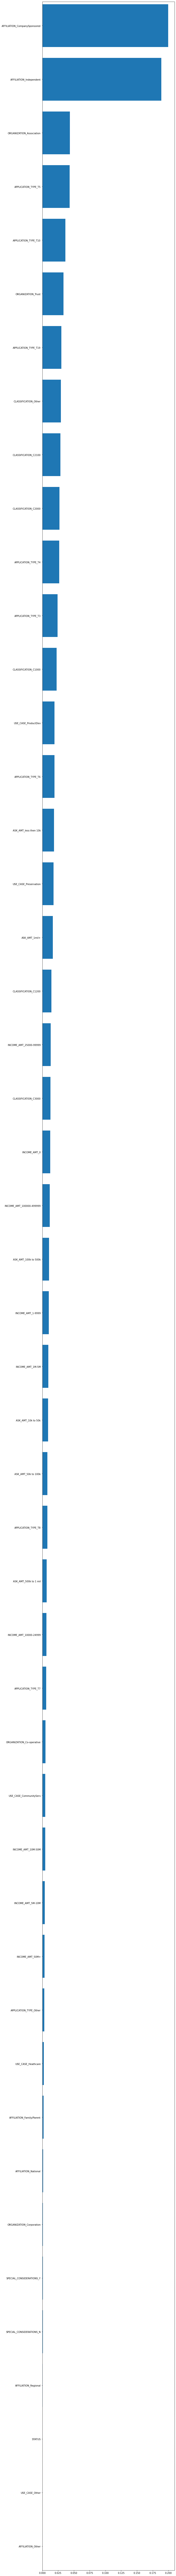

In [15]:
from matplotlib import pyplot as plt

features = sorted(zip(X_features.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,200)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [16]:
dummy_df.columns

Index(['STATUS', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       '

In [17]:
#X_features = dummy_df.drop(["IS_SUCCESSFUL"],axis=1)
selected_features = X_features[["AFFILIATION_CompanySponsored", "AFFILIATION_Independent", "ORGANIZATION_Association", "APPLICATION_TYPE_T5", "APPLICATION_TYPE_T10","ORGANIZATION_Trust",
"APPLICATION_TYPE_T19","CLASSIFICATION_Other", "CLASSIFICATION_C2100","CLASSIFICATION_C2000","APPLICATION_TYPE_T4","APPLICATION_TYPE_T3", "CLASSIFICATION_C1000"]]
selected_features.head()

,AFFILIATION_CompanySponsored,AFFILIATION_Independent,ORGANIZATION_Association,APPLICATION_TYPE_T5,APPLICATION_TYPE_T10,ORGANIZATION_Trust,APPLICATION_TYPE_T19,CLASSIFICATION_Other,CLASSIFICATION_C2100,CLASSIFICATION_C2000,APPLICATION_TYPE_T4,APPLICATION_TYPE_T3,CLASSIFICATION_C1000
0,0,1,1,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,1,0
2,1,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,0,1,1


In [18]:
# train the selected set 
X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(selected_features, y_features, random_state=1)


new_scaler = StandardScaler()

# Fit the StandardScaler
X_selected_scaler = new_scaler.fit(X_selected_train)

# Scale the data
X_select_train_scaled = X_selected_scaler.transform(X_selected_train)
X_select_test_scaled = X_selected_scaler.transform(X_selected_test)

## Compile, Train and Evaluate the Model

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
# Define the model - deep neural net
number_input_features = len(X_select_train_scaled[0])
hidden_nodes_layer1 =  40
hidden_nodes_layer2 = 40

#added layers after first optimization  
hidden_nodes_layer3 = 40
hidden_nodes_layer4 = 40
hidden_nodes_layer5 = 40
hidden_nodes_layer6 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# new layers after first optimization (see test_copy)
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid"))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="sigmoid"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()


#{'activation': 'sigmoid',
# 'first_units': 5,
# 'num_layers': 6,
# 'units_0': 9,
# 'units_1': 23,
# 'units_2': 13,
# 'units_3': 3,
# 'units_4': 5,
# 'units_5': 21,
# 'tuner/epochs': 20,
# 'tuner/initial_epoch': 7,
# 'tuner/bracket': 1,
# 'tuner/round': 1,
# 'tuner/trial_id': '0023'}

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                560       
                                                                 
 dense_1 (Dense)             (None, 40)                1640      
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 40)                1640      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 40)                1640      
                                                                 
 dense_6 (Dense)             (None, 1)                 4

In [20]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
# Train the model
#fit_model = nn.fit(X_train_scaled, y_train, epochs=100)
fit_model = nn.fit(X_select_train_scaled, y_selected_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6267 - accuracy: 0.6610
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5886 - accuracy: 0.7210
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.7230
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5857 - accuracy: 0.7240
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5853 - accuracy: 0.7233
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5850 - accuracy: 0.7234
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5846 - accuracy: 0.7243
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5844 - accuracy: 0.7237
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5833 - accuracy: 0.7238
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5816 - accura

In [22]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_select_test_scaled,y_selected_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5690 - accuracy: 0.7242 - 441ms/epoch - 2ms/step
Loss: 0.5690417885780334, Accuracy: 0.7241982221603394


In [23]:
# auto optimization

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=2), activation=activation, input_dim=48))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 30)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [24]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite= True)

tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 53s]
val_accuracy: 0.5292128324508667

Best val_accuracy So Far: 0.7323614954948425
Total elapsed time: 00h 19m 41s
INFO:tensorflow:Oracle triggered exit


In [25]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 19,
 'num_layers': 7,
 'units_0': 7,
 'units_1': 15,
 'units_2': 29,
 'units_3': 29,
 'units_4': 17,
 'units_5': 23,
 'units_6': 25,
 'units_7': 23,
 'units_8': 29,
 'units_9': 15,
 'units_10': 23,
 'units_11': 21,
 'units_12': 23,
 'units_13': 23,
 'units_14': 25,
 'units_15': 25,
 'units_16': 29,
 'units_17': 23,
 'units_18': 29,
 'units_19': 23,
 'units_20': 25,
 'units_21': 7,
 'units_22': 13,
 'units_23': 15,
 'units_24': 1,
 'units_25': 5,
 'units_26': 13,
 'units_27': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

In [26]:
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5727 - accuracy: 0.7324 - 516ms/epoch - 2ms/step
Loss: 0.5726569294929504, Accuracy: 0.7323614954948425


In [27]:
# Export our model to HDF5 file
best_model.save("crypto.h5")